In [1]:
from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score

from bella.parsers import semeval_14
from bella.helper import read_config

Using TensorFlow backend.


# How to use the pre-trained models

A lot of the models trained in the model zoo took a long time to train espically the Neural Network models which include LSTM, TDLSTM, and TCLSTM. In this notebook we are going to show you how to:
1. Load the models
2. Use the models to predict on some of the test data

First we need the path to the model zoo:

In [2]:
##
#  ADD YOUR CONFIG FILE PATH HERE 
##
CONFIG_FP = Path('..', 'config.yaml')
model_zoo_folder = Path(read_config('model_zoo_folder', CONFIG_FP))


for model_file in model_zoo_folder.iterdir():
    print(model_file.name)

LSTM SemEval 14 Restaurant.h5
LSTM SemEval 14 Restaurant.pkl
LSTM YouTuBean.h5
LSTM YouTuBean.pkl
LSTM SemEval 14 Laptop.h5
LSTM SemEval 14 Laptop.pkl
LSTM Mitchel.h5
LSTM Mitchel.pkl
TDLSTM YouTuBean.h5
TDLSTM YouTuBean.pkl
LSTM Dong Twitter.h5
LSTM Dong Twitter.pkl
TCLSTM YouTuBean.h5
TCLSTM YouTuBean.pkl
TDLSTM Mitchel.h5
TDLSTM Mitchel.pkl
TDLSTM Dong Twitter.h5
TDLSTM Dong Twitter.pkl
LSTM Election Twitter.h5
LSTM Election Twitter.pkl
TDLSTM SemEval 14 Restaurant.h5
TDLSTM SemEval 14 Restaurant.pkl
TCLSTM Mitchel.h5
TCLSTM Mitchel.pkl
TDLSTM SemEval 14 Laptop.h5
TDLSTM SemEval 14 Laptop.pkl
TDLSTM Election Twitter.h5
TDLSTM Election Twitter.pkl
TCLSTM SemEval 14 Laptop.h5
TCLSTM SemEval 14 Laptop.pkl
TCLSTM Dong Twitter.h5
TCLSTM Dong Twitter.pkl
TCLSTM Election Twitter.h5
TCLSTM Election Twitter.pkl
TCLSTM SemEval 14 Restaurant.h5
TCLSTM SemEval 14 Restaurant.pkl
Target Dependent Mitchel
Target Dependent Plus Mitchel
Target Dependent Election Twitter
Target Dependent Plus Electio

In the model zoo you should be able to see the list of models as shown above. The models in there can be broken up into different methods which are the following: 
1. Target Dependent
2. Target Dependent Plus
3. TDParse
4. TDParse Plus
5. LSTM
6. TDLSTM
7. TCLSTM 

Each one of these methods was trained on the datasets which can be found in the [Dataset notebook](./datasets.ipynb). Therefore we have a model for each method on each dataset, if you would like to see how these models were trained look at the following Mass Evaluation notebooks: 
1. [Target Dependent methods](./Mass%20Evaluation%20-%20Target%20Dependent.ipynb)
2. [TDParse methods](./Mass%20Evaluation%20-%20TDParse.ipynb)
3. [LSTM methods](./Mass%20Evaluation%20LSTM.ipynb)

We are going to show how to load a model from each of the methods on the [SemEval 2014 Resturant dataset](http://alt.qcri.org/semeval2014/task4/index.php?id=data-and-tools).

We are going to load one model at a time as each model can take:
1. A long time to load
2. Take up a lot of memory

For each model we will:
1. Load it
2. Predict the sentiment of the test data on the SemEval 2014 Resturant dataset
3. Evaluate the performance using Accuracy and Macro F1 score.

But before going through each model we need to load the test data:

In [3]:
CONFIG_FP = Path('..', 'config.yaml')

train_data = semeval_14(read_config('semeval_2014_rest_train', CONFIG_FP))
test_data = semeval_14(read_config('semeval_2014_rest_test', CONFIG_FP))
y_test = test_data.sentiment_data()
dataset_name = 'SemEval 14 Restaurant'

As the test data has been loaded all the cells grouped by models can be run independently.

## Target Dependent and Target Dependent Plus Models

These two methods come from [Vo and Zhang's paper](https://www.ijcai.org/Proceedings/15/Papers/194.pdf).

In [4]:
from bella.models.target import TargetDep


target_dep_model_path = Path(model_zoo_folder, 
                             f'{TargetDep.name()} {dataset_name}')
# Loads the model
target_dep = TargetDep.load(target_dep_model_path)

# Predicts the class on the test data
target_dep_preds = target_dep.predict(test_data.data())
# Evaluates the results
target_dep_f1 = f1_score(y_test, target_dep_preds, 
                         average='macro') * 100
target_dep_acc = accuracy_score(y_test, 
                                target_dep_preds) * 100
print(f'Target Dependent scores:\nMacro F1 score: {target_dep_f1}\n'
      f'Accuracy: {target_dep_acc}')

Target Dependent scores:
Macro F1 score: 56.15868320061148
Accuracy: 73.83928571428572


In [5]:
from bella.models.target import TargetDepPlus

target_dep_plus_model_path = Path(model_zoo_folder, 
                                  f'{TargetDepPlus.name()} {dataset_name}')
# Loads the model
target_dep_plus = TargetDepPlus.load(target_dep_plus_model_path)
# Predicts the class on the test data
target_dep_plus_preds = target_dep_plus.predict(test_data.data())
# Evaluates the results
target_dep_plus_f1 = f1_score(y_test, target_dep_plus_preds, 
                              average='macro') * 100
target_dep_plus_acc = accuracy_score(y_test, 
                                     target_dep_plus_preds) * 100
print(f'Target Dependent Plus scores:\nMacro F1 score: {target_dep_plus_f1}\n'
      f'Accuracy: {target_dep_plus_acc}')

Target Dependent Plus scores:
Macro F1 score: 57.71114226900386
Accuracy: 74.64285714285714


## TDParse and TDParse Plus Models

These two methods come from [Wang et al.'s paper](https://www.aclweb.org/anthology/E17-1046). Just a note that these models use the Tweebo dependency parser.

In [6]:
from bella.models.tdparse import TDParse

tdparse_model_path = Path(model_zoo_folder, 
                          f'{TDParse.name()} {dataset_name}')
# Loads the model
tdparse = TDParse.load(tdparse_model_path)
# Predicts the class on the test data
tdparse_preds = tdparse.predict(test_data.data())
# Evaluates the results
tdparse_f1 = f1_score(y_test, tdparse_preds, average='macro') * 100
tdparse_acc = accuracy_score(y_test, tdparse_preds) * 100
print(f'TDParse scores:\nMacro F1 score: {tdparse_f1}\n'
      f'Accuracy: {tdparse_acc}')

TDParse scores:
Macro F1 score: 59.63851089722315
Accuracy: 73.48214285714286


In [7]:
from bella.models.tdparse import TDParsePlus


tdparse_plus_model_path = Path(model_zoo_folder, 
                               f'{TDParsePlus.name()} {dataset_name}')
# Loads the model
tdparse_plus = TDParsePlus.load(tdparse_plus_model_path)
# Predicts the class on the test data
tdparse_plus_preds = tdparse_plus.predict(test_data.data())
# Evaluates the results
tdparse_plus_f1 = f1_score(y_test, tdparse_plus_preds, 
                           average='macro') * 100
tdparse_plus_acc = accuracy_score(y_test, 
                                  tdparse_plus_preds) * 100
print(f'TDParse Plus scores:\nMacro F1 score: {tdparse_plus_f1}\n'
      f'Accuracy: {tdparse_plus_acc}')

TDParse Plus scores:
Macro F1 score: 61.107803501564874
Accuracy: 76.16071428571428


## LSTM, TDLSTM and TCLSTM Models

These three methods come from [Tang et al.'s paper](https://aclweb.org/anthology/C16-1311). 

We also show how you can visualise the model. This requires pydot and graphviz to be installed.

LSTM scores:
Macro F1 score: 46.36196276283449
Accuracy: 71.07142857142857


/home/andrew/Envs/Bella/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


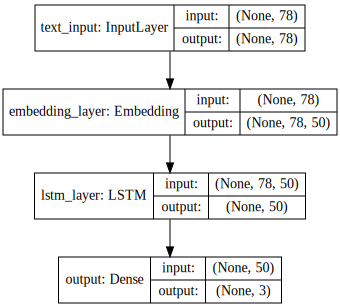

In [8]:
from bella.models.tdlstm import LSTM
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

lstm_model_path = Path(model_zoo_folder, 
                       f'{LSTM.name()} {dataset_name}')
lstm = LSTM.load(lstm_model_path)

sentiment_mapper = {0: -1, 1: 0, 2: 1}

lstm_preds = lstm.predict(test_data.data_dict())
lstm_preds = [sentiment_mapper[pred] for pred in lstm_preds]
# Evaluates the results
lstm_f1 = f1_score(y_test, lstm_preds, average='macro') * 100
lstm_acc = accuracy_score(y_test, lstm_preds) * 100
print(f'LSTM scores:\nMacro F1 score: {lstm_f1}\n'
      f'Accuracy: {lstm_acc}')
SVG(model_to_dot(lstm.model, show_shapes=True, 
                 show_layer_names=True).create(prog='dot', format='svg'))

TDLSTM scores:
Macro F1 score: 57.681236460102625
Accuracy: 74.375


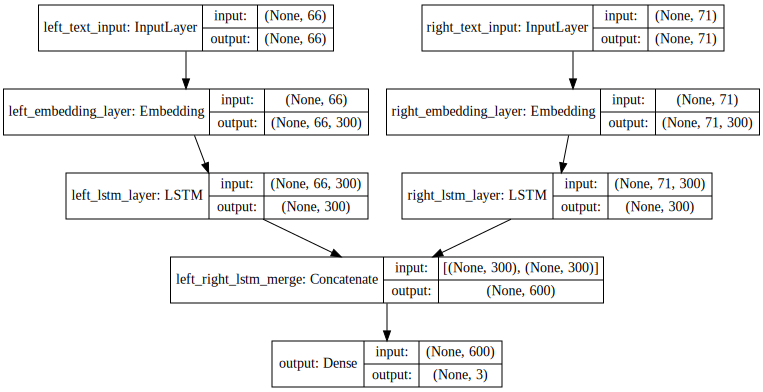

In [9]:
from bella.models.tdlstm import TDLSTM
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

tdlstm_model_path = Path(model_zoo_folder, 
                         f'{TDLSTM.name()} {dataset_name}')
tdlstm = TDLSTM.load(tdlstm_model_path)

sentiment_mapper = {0: -1, 1: 0, 2: 1}

tdlstm_preds = tdlstm.predict(test_data.data_dict())
tdlstm_preds = [sentiment_mapper[pred] for pred in tdlstm_preds]
# Evaluates the results
tdlstm_f1 = f1_score(y_test, tdlstm_preds, average='macro') * 100
tdlstm_acc = accuracy_score(y_test, tdlstm_preds) * 100
print(f'TDLSTM scores:\nMacro F1 score: {tdlstm_f1}\n'
      f'Accuracy: {tdlstm_acc}')

SVG(model_to_dot(tdlstm.model, show_shapes=True, 
                 show_layer_names=True).create(prog='dot', format='svg'))

TCLSTM scores:
Macro F1 score: 55.375232710170344
Accuracy: 72.41071428571428


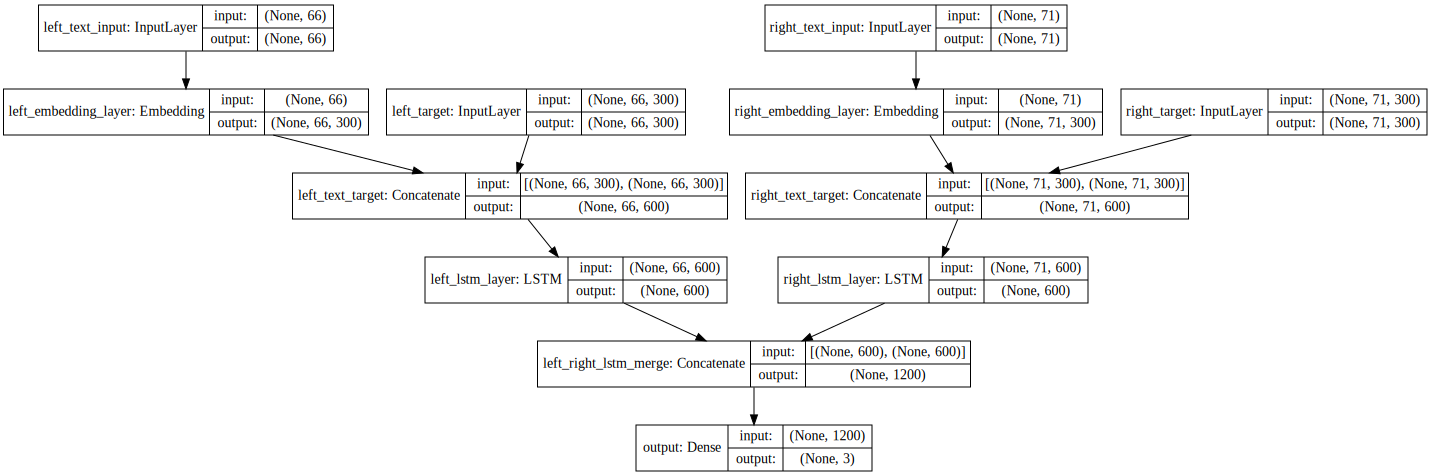

In [10]:
from bella.models.tdlstm import TCLSTM
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
tclstm_model_path = Path(model_zoo_folder, 
                         f'{TCLSTM.name()} {dataset_name}')
tclstm = TCLSTM.load(tclstm_model_path)

sentiment_mapper = {0: -1, 1: 0, 2: 1}

tclstm_preds = tclstm.predict(test_data.data_dict())
tclstm_preds = [sentiment_mapper[pred] for pred in tclstm_preds]
# Evaluates the results
tclstm_f1 = f1_score(y_test, tclstm_preds, average='macro') * 100
tclstm_acc = accuracy_score(y_test, tclstm_preds) * 100
print(f'TCLSTM scores:\nMacro F1 score: {tclstm_f1}\n'
      f'Accuracy: {tclstm_acc}')
SVG(model_to_dot(tclstm.model, show_shapes=True, 
                 show_layer_names=True).create(prog='dot', format='svg'))